# Gradient descent and linear regression

The aim is to understand regression models and gradient descent algorithm including automatic differentiation. 

# Linear Regression in Matrix Form

<img src='regression_LSS.png'>
We want to find a linear function (red line) that best fits the data (this is just illustration).

## Linear Functions in vector form

More formally, we want to fit a linear function of the following form:
    $$\hat y = w_0 + \sum_i w_i x_i $$
$w_0$ is the offset and $w_i$ defines the slope for the ith input.
We can also write the output $\hat{y}$ in vector form
$$\hat{y} =  \boldsymbol x^T\boldsymbol w \textrm{ with } \boldsymbol w = \left[\begin{array}{c}w_0 \\ \vdots \\ w_d \end{array} \right] \textrm{ and } \boldsymbol x = \left[\begin{array}{c}1 \\ x_1 \\ \vdots \\ x_d \end{array} \right]$$
Note that we prepended a one to the $\boldsymbol x$-vector which will multiply with the offset $w_0$ when computing the scalar product.

## Matrices for multiple outputs

We will now consider multiple samples $\boldsymbol x_i$, where we will prepend again a $1$ to create the ${\boldsymbol x}_{i} = \left[\begin{array}{c}1 \\ x_{i,1} \\ \vdots \\ x_{i,d} \end{array} \right]$ 
 vector. We can stack all ${\boldsymbol x_{i}}$  in a matrix ${\boldsymbol X} = \left[\begin{array}{c}{\boldsymbol x}_{d}\\ \vdots \\ {\boldsymbol x}_{n}  \end{array} \right].$ Here $n$ is the number of data points.
The output $\hat y_i$ for each sample can also be  subsumed in a vector 
$\hat{\boldsymbol y} = \left[\begin{array}{c}\hat{y}_{1}\\ \vdots \\ \hat{ y}_{n}  \end{array} \right] = \left[\begin{array}{c} {\boldsymbol x_1}^T {\boldsymbol w} \\ \vdots \\ {\boldsymbol x_n}^T {\boldsymbol w}  \end{array} \right] = {\boldsymbol X} {\boldsymbol{w}}.$ Hence, the computation of all output values can be written as matrix vector product


## Lets do it in python...

In [88]:
import pandas as pd
import matplotlib.pyplot
import numpy as np
%matplotlib notebook
## get input output vectors from the data frame and plot the data
import matplotlib.pyplot as plt

We will consider a 1-dimensional problem as illustrated below. We are given 10 training samples and we want to fit
a line to these samples. Our line has 2 parameters, $w_0$ and $w_1$. Lets first look at the data and how we can compute a prediction using hand-picked 
$w_0$ and $w_1$ values. 

In [216]:
data_train = pd.read_csv('train_data_regression.txt',header=None)
data_train.columns = ["x","y"]
data_test = pd.read_csv('test_data_regression.txt',header=None)
data_test.columns = ["x","y"]
data_train
#data_test

,x,y
0,4.201683,-82.750301
1,2.638821,-33.106455
2,1.634209,-15.227445
3,-4.266067,14.624664
4,4.570926,-124.522896
...,...,...
95,-3.039358,-3.972596
96,3.440808,-57.752298
97,-1.801189,-13.775976
98,-2.330486,17.354669


Here $x$ is the predictor or feature and $y$ is the response or target.

### Get the training data as numpy arrays

In [90]:
print(data_train['y'])
x_train = data_train['x'].values
y_train = data_train['y'].values

x_test = data_test['x'].values
y_test = data_test['y'].values


0     -82.750301
1     -33.106455
2     -15.227445
3      14.624664
4    -124.522896
         ...    
95     -3.972596
96    -57.752298
97    -13.775976
98     17.354669
99    -39.492808
Name: y, Length: 100, dtype: float64


### Plot the training data

<IPython.core.display.Javascript object>


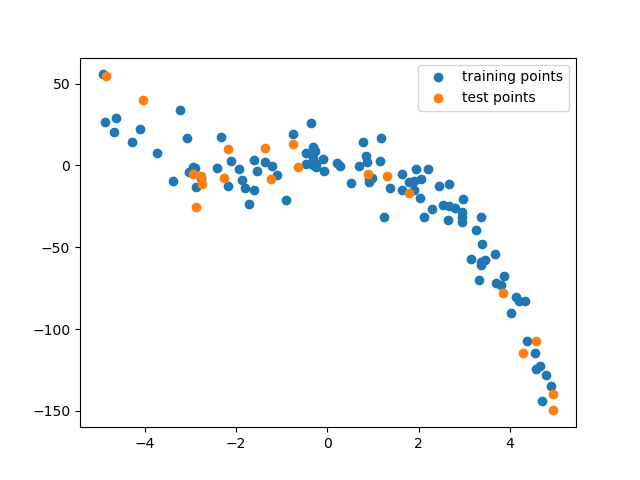

In [91]:
#plt.clf()
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)
plt.legend(('training points', 'test points'))
#plt.savefig('trainingdata.png')
plt.show()

## Preparing the data matrix
As a first step, lets construct the $\tilde{\boldsymbol{X}}$ matrix 

In [92]:
X = np.column_stack((np.ones(x_train.shape), x_train))
X

array([[ 1.        ,  4.20168299],
       [ 1.        ,  2.63882117],
       [ 1.        ,  1.63420937],
       [ 1.        , -4.26606736],
       [ 1.        ,  4.57092574],
       [ 1.        ,  0.97027498],
       [ 1.        ,  2.51946597],
       [ 1.        , -0.10395746],
       [ 1.        ,  2.97623859],
       [ 1.        , -0.34952399],
       [ 1.        ,  0.91759016],
       [ 1.        ,  3.35486268],
       [ 1.        ,  0.91688094],
       [ 1.        ,  2.93805206],
       [ 1.        ,  4.12792229],
       [ 1.        ,  3.80837887],
       [ 1.        ,  3.69211873],
       [ 1.        ,  2.03819096],
       [ 1.        , -0.26866551],
       [ 1.        , -0.31023934],
       [ 1.        ,  1.24767123],
       [ 1.        , -1.85986796],
       [ 1.        ,  2.94085838],
       [ 1.        ,  2.93957473],
       [ 1.        , -0.30693516],
       [ 1.        ,  0.20634326],
       [ 1.        ,  3.3100928 ],
       [ 1.        , -1.9380271 ],
       [ 1.        ,

# Matrix calculus

Now, we want to compute the derivatives of functions $f(\boldsymbol{x})$ that take several input values, i.e., a vector $\boldsymbol{x}$. As we have several input values $x_i$, we also need to derive the function with respect to each of them. The derivative of $f$ is therefore not a single value, but a vector that contains the derivative w.r.t each variable, i.e.
$$\frac{\partial f(\boldsymbol x)}{\partial \boldsymbol x} = \left[\frac{\partial f(\boldsymbol x)}{\partial  x_1}, \dots, \frac{\partial f(\boldsymbol x)}{\partial x_d}\right].$$

The rules for the differentation are similar to the scalar rules, with small differences as listed below:
* **Constants**:
$$ \frac{\partial \boldsymbol a}{\partial \boldsymbol x} = \boldsymbol 0$$ 
* **Linear term:** 
$$ \frac{\partial \boldsymbol A \boldsymbol x}{\partial \boldsymbol x} = \boldsymbol A$$
* **Quadratic terms**:
    $$ \frac{\partial \boldsymbol x^T \boldsymbol x}{\partial \boldsymbol x} = 2 \boldsymbol x^T$$
    
    $$ \frac{\partial \boldsymbol x^T \boldsymbol A \boldsymbol x}{\partial \boldsymbol x} = 2 \boldsymbol x^T \boldsymbol A,$$
    if $\boldsymbol A$ is a symmetrix matrix.
* **Linearity**: Still holds...
* **Chain Rule**: The chain rule is easy to generalize to the vector case.
For a composition of functions, i.e., $y = \boldsymbol f(\boldsymbol g( \boldsymbol x))$, we can again introduce an auxiliary variable $\boldsymbol u = \boldsymbol g( \boldsymbol x)$. The derivative of  $y = f(\boldsymbol g( \boldsymbol x))$ is then given by
$$ \frac{\partial f(\boldsymbol g(\boldsymbol x)) }{\partial \boldsymbol x} = \frac{\partial  f(\boldsymbol u)}{\partial \boldsymbol u} \frac{\partial \boldsymbol u}{\partial \boldsymbol x}.$$

**Example:** We want to compute the derivative of $$ (\boldsymbol B \boldsymbol x)^T(\boldsymbol B \boldsymbol x)$$. This function can be decomposed in $f(\boldsymbol u) = \boldsymbol u^T \boldsymbol u$ and $\boldsymbol u =\boldsymbol g( \boldsymbol x) = \boldsymbol B \boldsymbol x$, with $h(\boldsymbol x) = f(\boldsymbol g(\boldsymbol x))$.
* Compute derivative of $f$: $$ \frac{\partial  f(\boldsymbol u)}{\partial \boldsymbol u} = \frac{\partial  (\boldsymbol u^T \boldsymbol u)}{\partial \boldsymbol u}= 2 \boldsymbol u^T.$$
* Compute derivative of $\boldsymbol u$: $$ \frac{\partial  \boldsymbol u}{\partial \boldsymbol x} = \frac{\partial  (\boldsymbol B \boldsymbol x)}{\partial \boldsymbol x} = \boldsymbol B.$$
* Final Result:
$$ \frac{\partial f(\boldsymbol g( \boldsymbol x)) }{\partial \boldsymbol x} = \frac{\partial  f( \boldsymbol u)}{\partial \boldsymbol u} \frac{\partial \boldsymbol u}{\partial \boldsymbol x} = 2 \boldsymbol u^T \cdot \boldsymbol B =  2 \underbrace{\boldsymbol x^T \boldsymbol B^T}_{u^T} \boldsymbol B$$

### Excercise 1

Using the chain rule, compute the derivative of   
$$E(\boldsymbol x) = (\boldsymbol a - 5\boldsymbol x)^T \boldsymbol A(\boldsymbol{a} - 5 \boldsymbol x).$$ Set the derivative to zero and compute the minimum. 
Plot $E(\boldsymbol x)$ and $\frac{\partial E(\boldsymbol x)}{\partial x}$ as 3D plot. For $x_0$ and $x_1$, use an interval of $[-5, 5]$ for the plot using $51$ partitions for each dimension. Confirm your finding of the minimum in the plot. Note that $\boldsymbol x$ is a 2x1 vector in this equation.

$$E(\boldsymbol x) = \boldsymbol a^T \boldsymbol A \boldsymbol a - 10 \boldsymbol a^T \boldsymbol A \boldsymbol x +  25 \boldsymbol x^T \boldsymbol A  \boldsymbol x $$

$$\frac{\partial E(\boldsymbol x)}{\partial x} = 10 \boldsymbol a^T \boldsymbol A + 50 \boldsymbol x^T \boldsymbol A   $$

$$ \boldsymbol x = \frac{1}{5} \boldsymbol a$$ 



<IPython.core.display.Javascript object>


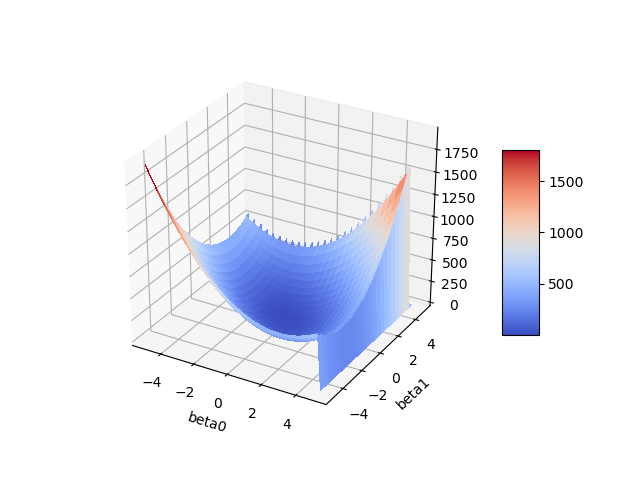

In [93]:
A = np.array([[1, 0.5], [0.5, 1]])
a = np.array([[1], [0]])

# specify data points for x0 and x1 (from - 5 to 5, using 51 uniformly distributed points)
x0Array = np.linspace(-5, 5, 51)
x1Array = np.linspace(-5, 5, 51)

# to store the values E(x)
Earray = np.zeros((51,51))

for i in range(0,50):
    for j in range(0,50):
        
        x = np.array([[x0Array[i]], [x1Array[j]]])
        tmp = a - 5 * x
        
        Earray[i,j] = tmp.transpose().dot(A).dot(tmp)


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')

x0Grid, x1Grid = np.meshgrid(x0Array, x1Array)

# Plot the surface.
surf = ax.plot_surface(x0Grid, x1Grid, Earray, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel('beta0')
plt.ylabel('beta1')
plt.savefig('errorfunction.png')
plt.show()


# Minimizing the SSE function

In order to compute the minimum of the function, we need to compute its derivative and set it to zero.
The SSE function is given by: $$SSE(\boldsymbol{w}) = (\boldsymbol{y} - \boldsymbol{X}\boldsymbol{w})^T  (\boldsymbol{y} - {\boldsymbol{X}}{\boldsymbol{w}}).$$
We can again use the chain rule and introduce the auxiliary variable $\boldsymbol u = (\boldsymbol{y} - {\boldsymbol{X}}{\boldsymbol{w}})$. The SSE is then given by 
$$SSE({\boldsymbol w}) = f(\boldsymbol g({\boldsymbol w})),$$
with $f(\boldsymbol{u}) = \boldsymbol{u}^T\boldsymbol{u}$ and $\boldsymbol{u} = \boldsymbol{g}({ \boldsymbol{w}})= (\boldsymbol{y} - {\boldsymbol{X}}{\boldsymbol{w}}) $

* Compute derivative of $f$: $$ \frac{\partial  f(\boldsymbol u)}{\partial \boldsymbol u} = \frac{\partial  (\boldsymbol u^T \boldsymbol u)}{\partial \boldsymbol u}= 2 \boldsymbol u^T.$$
* Compute derivative of $\boldsymbol u$: $$ \frac{\partial  \boldsymbol u}{\partial \boldsymbol{w}} = \frac{\partial (\boldsymbol{y} - \boldsymbol{X}\boldsymbol{w}) }{\partial  \boldsymbol{w}} = - \boldsymbol{X}.$$
* Final Result:
$$ \frac{\partial f(\boldsymbol g( \boldsymbol{w})) }{\partial \boldsymbol{w} } = \frac{\partial  f( \boldsymbol u)}{\partial \boldsymbol u} \frac{\partial \boldsymbol u}{\partial \boldsymbol{w}} = - 2 \boldsymbol u \boldsymbol{X} = - 2(\boldsymbol{y} - \boldsymbol{X}\boldsymbol{w})^T\boldsymbol{X}. $$

#### When computing the SSE and gradient, it would prevent overflow by dividing the number of samples N from both SSE(w) and the gradient.

### Gradient Descent to find the parameters
We have the gradient vector and so can find the optimal parameters using Gradient Descent algorithm.
You can now write the gradient descent algorithm code to find the weights. Note that when computing the gradient, you should consider to use the explicit gradient derived and automatic differentiation.

In [106]:
#!pip install tensorflow


In [110]:
# put you code here
#import tensorflow as tf
import numpy as np
w_old = [np.random.randn(),np.random.randn()]
w_new = [np.random.randn(),np.random.randn()]
#w_old = tf.random.normal([1,2])
#w_new = tf.random.normal([1,2])
epsilon = 0.00001
alpha = 0.01
N = len(X)
print(N)
def grad(w):
    return -2*X.transpose().dot(y_train-X.dot(w))/N

#print(y_train)
#print(tf.squeeze(X.dot(tf.transpose(w_old))))
#print(y_train - tf.squeeze(X.dot(tf.transpose(w_old))))
#a = y_train - tf.squeeze(X.dot(tf.transpose(w_old)))
#print(tf.tensordot(a,a,1))

#def f(w):
#    return tf.tensordot(y_train - tf.squeeze(X.dot(tf.transpose(w_old))),y_train - tf.squeeze(X.dot(tf.transpose(w_old))),1)

#def grad(w):
#    with tf.GradientTape() as g:
#        g.watch(w)
#        obj = f(w)
#    return g.gradient(obj,w)

#print(f(w_old))
#print(grad(w_old))

states = []
while abs(np.linalg.norm(np.array(w_new)-np.array(w_old)))>epsilon:
    w_old = w_new
    print(grad(w_old))
    w_new = w_old - alpha*grad(w_old)
    states.append(w_new)
    print('w_new={}'.format(w_new))
print("Local minimum occurs at {}".format(w_new))

100
[ 43.67777795 203.35255439]
w_new=[-0.51928132 -1.40006094]
[ 40.09237436 171.98476961]
w_new=[-0.92020506 -3.11990864]
[ 36.99699012 145.41353182]
w_new=[-1.29017496 -4.57404395]
[ 34.31785953 122.90616251]
w_new=[-1.63335356 -5.80310558]
[ 31.99246301 103.84188624]
w_new=[-1.95327819 -6.84152444]
[29.96780983 87.69473978]
w_new=[-2.25295629 -7.71847184]
[28.19898316 74.01909156]
w_new=[-2.53494612 -8.45866275]
[26.64790733 62.43737265]
w_new=[-2.80142519 -9.08303648]
[25.2823033  52.62968163]
w_new=[-3.05424823 -9.6093333 ]
[24.07480375 44.32497705]
w_new=[ -3.29499626 -10.05258307]
[23.00220322 37.29361506]
w_new=[ -3.52501829 -10.42551922]
[22.04482281 31.34102682]
w_new=[ -3.74546652 -10.73892949]
[21.18597192 26.30236146]
w_new=[ -3.95732624 -11.0019531 ]
[20.41149216 22.03794727]
w_new=[ -4.16144116 -11.22233257]
[19.70937093 18.4294461 ]
w_new=[ -4.35853487 -11.40662703]
[19.069414   15.37659509]
w_new=[ -4.54922901 -11.56039299]
[18.48296811 12.79444598]
w_new=[ -4.7340586

w_new=[-13.47268264 -11.6231386 ]
[ 0.55238521 -0.05549997]
w_new=[-13.4782065 -11.6225836]
[ 0.54207763 -0.05446434]
w_new=[-13.48362727 -11.62203895]
[ 0.5319624  -0.05344803]
w_new=[-13.4889469  -11.62150447]
[ 0.52203592 -0.05245068]
w_new=[-13.49416725 -11.62097997]
[ 0.51229467 -0.05147194]
w_new=[-13.4992902  -11.62046525]
[ 0.50273519 -0.05051147]
w_new=[-13.50431755 -11.61996013]
[ 0.49335409 -0.04956892]
w_new=[-13.50925109 -11.61946444]
[ 0.48414804 -0.04864396]
w_new=[-13.51409257 -11.618978  ]
[ 0.47511378 -0.04773626]
w_new=[-13.51884371 -11.61850064]
[ 0.4662481  -0.04684549]
w_new=[-13.52350619 -11.61803219]
[ 0.45754786 -0.04597135]
w_new=[-13.52808167 -11.61757247]
[ 0.44900996 -0.04511352]
w_new=[-13.53257177 -11.61712134]
[ 0.44063138 -0.0442717 ]
w_new=[-13.53697809 -11.61667862]
[ 0.43240915 -0.04344558]
w_new=[-13.54130218 -11.61624417]
[ 0.42434034 -0.04263488]
w_new=[-13.54554558 -11.61581782]
[ 0.4164221  -0.04183931]
w_new=[-13.5497098  -11.61539942]
[ 0.4086

[ 0.01301105 -0.00130726]
w_new=[-13.7618646  -11.59408353]
[ 0.01276826 -0.00128287]
w_new=[-13.76199228 -11.5940707 ]
[ 0.01253001 -0.00125893]
w_new=[-13.76211758 -11.59405811]
[ 0.01229619 -0.00123544]
w_new=[-13.76224054 -11.59404575]
[ 0.01206675 -0.00121239]
w_new=[-13.76236121 -11.59403363]
[ 0.01184158 -0.00118976]
w_new=[-13.76247962 -11.59402173]
[ 0.01162061 -0.00116756]
w_new=[-13.76259583 -11.59401006]
[ 0.01140377 -0.00114577]
w_new=[-13.76270987 -11.5939986 ]
[ 0.01119098 -0.00112439]
w_new=[-13.76282178 -11.59398736]
[ 0.01098215 -0.00110341]
w_new=[-13.7629316  -11.59397632]
[ 0.01077722 -0.00108282]
w_new=[-13.76303937 -11.59396549]
[ 0.01057612 -0.00106262]
w_new=[-13.76314513 -11.59395487]
[ 0.01037877 -0.00104279]
w_new=[-13.76324892 -11.59394444]
[ 0.0101851  -0.00102333]
w_new=[-13.76335077 -11.59393421]
[ 0.00999504 -0.00100424]
w_new=[-13.76345072 -11.59392416]
[ 0.00980853 -0.0009855 ]
w_new=[-13.76354881 -11.59391431]
[ 0.00962551 -0.00096711]
w_new=[-13.763

In the following you will see that the weights can be explicitly found by setting the gradient to zero.

### Solving for the parameters

We now need to set the derivative to $0$, i.e., 
$$\frac{\partial SSE( {\boldsymbol{w}})}{\partial {\boldsymbol{w}}} = \boldsymbol 0.$$
Hence, the derivative w.r.t every dimension should be zero. Now, we solve for ${\boldsymbol{w}}$ using the following steps:
* Cancel constant factors:

$$(\boldsymbol{y} - {\boldsymbol{X}}{\boldsymbol{w}})^T {\boldsymbol{X}} = \boldsymbol 0. $$
* Transpose on both sides (using $(\boldsymbol{A} \boldsymbol{B})^T = \boldsymbol{B}^T \boldsymbol{A}^T$): 

$${\boldsymbol{X}}^T(\boldsymbol{y} - {\boldsymbol{X}}{\boldsymbol{w}}) = \boldsymbol 0 $$
* Multiply out brackets

$${\boldsymbol{X}}^T\boldsymbol{y} - {\boldsymbol{X}}^T {\boldsymbol{X}}{\boldsymbol{w}} = \boldsymbol 0 $$
* Bring ${\boldsymbol{X}}^T\boldsymbol{y}$ on other side

$${\boldsymbol{X}}^T {\boldsymbol{X}}{\boldsymbol{w}} = {\boldsymbol{X}}^T\boldsymbol{y}$$

* Multiply both sides by the inverse of ${\boldsymbol{X}}^T {\boldsymbol{X}}$ (multiply on the left)

$${\boldsymbol{w}} = ({\boldsymbol{X}}^T {\boldsymbol{X}})^{-1} {\boldsymbol{X}}^T\boldsymbol{y}$$


## The least squares solution

The least squares solution is given by:
$${\boldsymbol{w}} = ({\boldsymbol{X}}^T {\boldsymbol{X}})^{-1} {\boldsymbol{X}}^T\boldsymbol{y}$$

* ** Note: ** The term $({\boldsymbol{X}}^T{\boldsymbol{X}})^{-1}{\boldsymbol{X}}^T$ is called the pseudo inverse of matrix ${\boldsymbol{X}}$. It is used to invert non-square matrices that could not be inverted otherwise.

## Exercise 2 - Implementation in python

We now want to implement the least squares solution that is given above in python. First, construct the Xtilde matrix.
Subsequently implement the least squares solution. Try to avoud the linalg.inv method but use the numerically more stable linalg.solve 
method instead. 
* Plot again the training data, ground truth and prediction with the optimal least squares solution
* What is the SSE of the optimal solution? 


In [96]:
# Check wether we still have Xtilde (otherwise we need to rerun all scripts)
X = np.column_stack((np.ones(x_train.shape), x_train))

In [172]:
import numpy.linalg as linalg

XX = X.transpose().dot(X)

w = np.linalg.solve(XX, X.transpose().dot(y_train))
#w = np.linalg.inv(XX).dot(X.transpose().dot(y_train))

w

array([-13.76870714, -11.59339603])

<IPython.core.display.Javascript object>


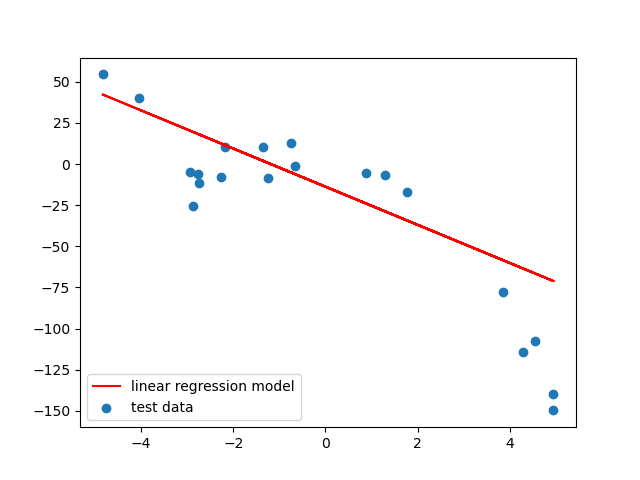

In [182]:
# Lets plot our function

import matplotlib.pyplot as plt

Xtest = np.column_stack((np.ones(x_test.shape), x_test))
ytest_predicted = Xtest.dot(w)
xy_test1=np.transpose(np.vstack([x_test, ytest_predicted]))
xy_test1 = xy_test1[np.lexsort(np.fliplr(xy_test1).T)]

plt.figure()
plt.scatter(x_test,y_test)
plt.plot(x_test, ytest_predicted,'r')
#plt.scatter(x_train,y_train)
plt.legend(('linear regression model', 'test data', 'training data'), loc = 'lower left')
#plt.hold(True)
plt.savefig('regression_LSS.png')
plt.show()

We can now compute  the error on the training set

In [123]:
# this is the total error
error = y_train - X.dot(w)
SSE = error.dot(error)
SSE

61048.51563311402

In comparison to the hand-picked line parameters from above, our error is approximately half. However, we can still see that the approximation is far from perfect. The ground truth can not be represented by a line, so we will always have a rather large approximation error. 

# Polynomial Regression

Instead of fitting a line, we can also fit a polynomial. We want to fit $d$th order polynomials which are given by
$$\hat y = w_0 + \sum_{i = 1}^d w_i x^i$$
Note that, while $\hat y$ is now non-linear in $x$, it is still linear in the parameters $w_i$. Hence, we can still apply linear regression here!

 ## Setting up the data matrix
 We can still describe $\hat{y}$ as a scalar product, i.e.,
 $$\hat{y} = w_0 + \sum_{i = 1}^n w_i x^i = \boldsymbol{x}^T\boldsymbol{w}, \textrm{ with } {\boldsymbol{x}} = \left[\begin{array}{c} 1 \\ x^1 \\ x^2 \\ \vdots \\ x^d  \end{array}\right] \textrm{ and } {\boldsymbol{w}} = \left[\begin{array}{c} w_0 \\ \vdots \\ w_{d+1}  \end{array}\right]$$
 

### Setting up the data matrix in python

In python, we write a small function that does the feature expansion up to a certain degree for a given data set x.

In [125]:
def getPolynomialDataMatrix(x, degree):
    X = np.ones(x.shape)
    for i in range(1,degree + 1):
        X = np.column_stack((X, x ** i))
    return X
    
print(getPolynomialDataMatrix(x_train, 4))

[[ 1.00000000e+00  4.20168299e+00  1.76541400e+01  7.41770998e+01
   3.11668659e+02]
 [ 1.00000000e+00  2.63882117e+00  6.96337717e+00  1.83751071e+01
   4.84886216e+01]
 [ 1.00000000e+00  1.63420937e+00  2.67064028e+00  4.36438538e+00
   7.13231950e+00]
 [ 1.00000000e+00 -4.26606736e+00  1.81993307e+01 -7.76395709e+01
   3.31215639e+02]
 [ 1.00000000e+00  4.57092574e+00  2.08933622e+01  9.55020069e+01
   4.36532582e+02]
 [ 1.00000000e+00  9.70274985e-01  9.41433546e-01  9.13449420e-01
   8.86297122e-01]
 [ 1.00000000e+00  2.51946597e+00  6.34770877e+00  1.59928362e+01
   4.02934066e+01]
 [ 1.00000000e+00 -1.03957459e-01  1.08071532e-02 -1.12348418e-03
   1.16794561e-04]
 [ 1.00000000e+00  2.97623859e+00  8.85799612e+00  2.63635098e+01
   7.84640952e+01]
 [ 1.00000000e+00 -3.49523987e-01  1.22167017e-01 -4.27003030e-02
   1.49247801e-02]
 [ 1.00000000e+00  9.17590163e-01  8.41971707e-01  7.72584956e-01
   7.08916356e-01]
 [ 1.00000000e+00  3.35486268e+00  1.12551036e+01  3.77593270e+01

## Exercise 3: Fit Polynomials with different degrees
We now want to test different polynomials and see which one fits our data best. First, implement a function 
that computes the optimal beta values given the input data x, output data y and the desired degree of the polynomial. Reuse the getPolynomialDataMatrix given above in your function.

In [126]:
import numpy.linalg as linalg

def getWeightsForPolynomialFit(x,y,degree):
    X = getPolynomialDataMatrix(x, degree)

    XX = X.transpose().dot(X)
    w = np.linalg.solve(XX, X.transpose().dot(y_train))

    return w

Given your getBetaForPolynomialFit function, plot the fitted function for a polynomial 1st, 2nd, 3rd and 4th degree.
Can we now fit the structure of the function better?

<IPython.core.display.Javascript object>


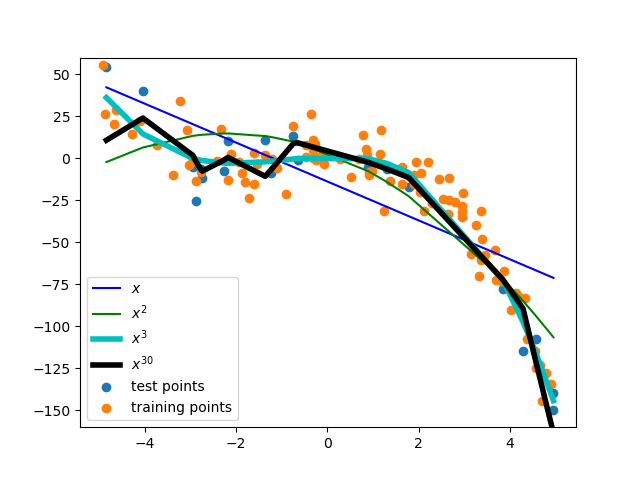

In [203]:
# Lets plot our polynomials function

import matplotlib.pyplot as plt

ax = plt.figure()
plt.scatter(x_test,y_test)
plt.scatter(x_train,y_train)

w1 = getWeightsForPolynomialFit(x_train,y_train,1)
Xtest1 =getPolynomialDataMatrix(x_test, 1)
ytest1 = Xtest1.dot(w1)
xy_test1=np.transpose(np.vstack([x_test, ytest1]))
xy_test1 = xy_test1[np.lexsort(np.fliplr(xy_test1).T)]
plt.plot(xy_test1[:,0], xy_test1[:,1],'b')

w2 = getWeightsForPolynomialFit(x_train,y_train,2)
Xtest2 =getPolynomialDataMatrix(x_test, 2)
ytest2 = Xtest2.dot(w2)
xy_test2=np.transpose(np.vstack([x_test, ytest2]))
xy_test2 = xy_test2[np.lexsort(np.fliplr(xy_test2).T)]
plt.plot(xy_test2[:,0], xy_test2[:,1],'g')

w3 = getWeightsForPolynomialFit(x_train,y_train,3)
Xtest3 =getPolynomialDataMatrix(x_test, 3)
ytest3 = Xtest3.dot(w3)
xy_test3=np.transpose(np.vstack([x_test, ytest3]))
xy_test3 = xy_test3[np.lexsort(np.fliplr(xy_test3).T)]
plt.plot(xy_test3[:,0], xy_test3[:,1],'c',linewidth=4.0)


w4 = getWeightsForPolynomialFit(x_train,y_train,30)
Xtest4 =getPolynomialDataMatrix(x_test, 30)
ytest4 = Xtest4.dot(w4)
xy_test4=np.transpose(np.vstack([x_test, ytest4]))
xy_test4 = xy_test4[np.lexsort(np.fliplr(xy_test4).T)]
plt.plot(xy_test4[:,0], xy_test4[:,1],'k',linewidth=4.0)

plt.legend(('$x$', '$x^2$', '$x^3$', '$x^{30}$','test points', 'training points'), loc = 'lower left')
plt.ylim([-160, 60])
plt.savefig('polynomial.png')

As we can see, the prediction using 3rd order looks very smooth. However, when we increase the order to 30, it seems the model is not smooth although it represents the data well.

We can clearly see that the prediction performance of our polynomials degrade. Why is that? 
This effect is called overfitting. We have too many data dimensions and too little data in order to fit the polynomial. Overfitting can have 2 bad effects:
* We fit the noise in the data
* The function 'does what it wants' between the data points. It is underspecified what the function should do between the data points. 

However, for the training data, the fit is actually almost perfect. Thats another characteristic of overfitting!

## Exercise 4: Evaluating the Models
We now want to evaluate the learned models to see which one works best. To do so, we compare polynomials of order
1 to 12. Compute the squarred error on the training and on the test set for each of these polynomials and plot them 
as a function of the degree of the polynomial. Due to the huge differences in the error, use a log-scale plot for the y-axis (see pyplot.semilogy) What are your observations? 

In [210]:
dmax = 30
SSEtrain = np.zeros((dmax,1))
SSEtest = np.zeros((dmax,1))

# Feel free to use the functions getWeightsForPolynomialFit and getPolynomialDataMatrix
for i in range(1,dmax):
    
    Xtrain = getPolynomialDataMatrix(x_train, i) 
    Xtest = getPolynomialDataMatrix(x_test, i)
    
    w = getWeightsForPolynomialFit(x_train, y_train, i)  
    
    SSEtrain[i - 1] = np.mean((Xtrain.dot(w) - y_train)**2)
    SSEtest[i - 1] = np.mean((Xtest.dot(w) - y_test)**2)

<IPython.core.display.Javascript object>


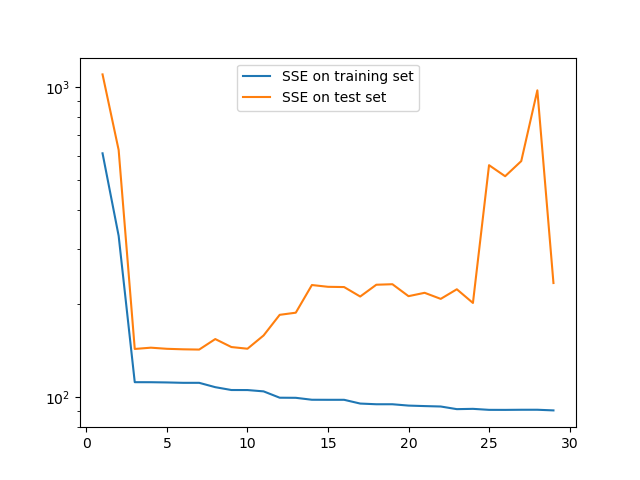

In [215]:
# Execute this...
import matplotlib.pyplot as plt

plt.figure();
plt.semilogy(range(1,dmax), SSEtrain[0:-1])
plt.semilogy(range(1,dmax), SSEtest[0:-1])
plt.legend(('SSE on training set', 'SSE on test set'))
plt.savefig('polynomial_evaluation.png')
plt.show()

## Overfitting / Under-Fitting
We can see that, while the training error decreases with a larger degree of the polynomial, the test set error
significantly increases (which is the one we are interested in). This is a typical behavior we get for overfitting. 
We can make the following conclusions:
* In order to fit the data well, we have to find the right model complexity
* **Over-fitting:** The model-complexity is too high (degree > 4). We fit the noise and not the data
* **Under-fitting:** The model-complexity is too low (degree < 3). We can not represent the data well enough.
* For choosing the optimal model, we always have to consider the error on an independent test set not on the training set
* On the training set, the error can be arbitrarily good. This is only an indication that the algorithm has learned the example by heart, not that it can generalize to new samples.

## Exercise 5: use cross validation to find the best degree
We can see that different degree represents a different model. Can you write a programme in the following to automatically select the degree?